In [1]:
from pathlib import Path
from tqdm.auto import tqdm
import csv
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
def prepare_RAVDESS_DS(path_audios):
    """
    Generation of the dataframe with the information of the dataset. The dataframe has the following structure:
     ______________________________________________________________________________________________________________________________
    |             name            |                     path                                   |     emotion      |     actor     |
    ______________________________________________________________________________________________________________________________
    |  01-01-01-01-01-01-01.wav   |    <RAVDESS_dir>/audios_16kHz/01-01-01-01-01-01-01.wav     |     Neutral      |     1         |
    ______________________________________________________________________________________________________________________________
    ...
    :param path_audios: Path to the folder that contains all the audios in .wav format, 16kHz and single-channel(mono)
    """
    dict_emotions_ravdess = {
        0: 'Neutral',
        1: 'Calm',
        2: 'Happy',
        3: 'Sad',
        4: 'Angry',
        5: 'Fear',
        6: 'Disgust',
        7: 'Surprise'
    }
    
    wav_paths, emotions = [], []
    for path in tqdm(Path(path_audios).glob("*/*.wav")):
        name = str(path).split('/')[-1].split('.')[0]
        label = int(name.split("-")[2]) - 1  # Start emotions in 0

        try:
            wav_paths.append(path)
            emotions.append(label)
        except Exception as e:
            # print(str(path), e)
            pass
        
    return wav_paths, emotions

In [3]:
def save_mfcc(save_path, wav_paths, emotions):
    os.makedirs(save_path, exist_ok=True)
    
    f = open('mfcc.csv', 'w', newline='')
    write = csv.writer(f)
    
    for i in tqdm(range(len(wav_paths))):
        y, sr = librosa.load(wav_paths[i], sr=16000)
        
        S = librosa.feature.mfcc(y=y, sr=sr, n_fft=1024, win_length=512, window='hamming', hop_length=256, n_mels=256, fmax=sr/2)
        mfcc = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(mfcc, sr=sr)
        
        mfcc_path = os.path.join(save_path, str(i)+'.png')
        plt.axis('off')
        plt.savefig(mfcc_path, bbox_inches='tight', pad_inches = 0)
        
        li = [mfcc_path, emotions[i]]
        write.writerow(li)

0it [00:00, ?it/s]

  0%|          | 0/1440 [00:00<?, ?it/s]

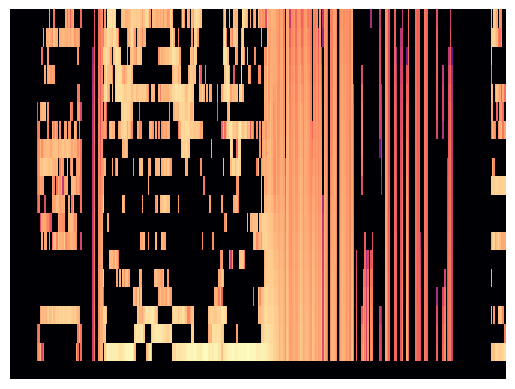

In [4]:
if __name__ == '__main__':
    """
        Executing it all at once is slow, so it is executed in parts.
    """

    wav_paths, emotions = prepare_RAVDESS_DS('dataset')
    wav_paths = np.asarray(wav_paths)
    
    save_mfcc('mfcc_images', wav_paths, emotions)